<a href="https://colab.research.google.com/github/yutinghuang0413/MDSProject1/blob/main/%E3%80%8Cproject1_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [ ]:
# your code here

# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
Shape of training data: (16512, 8)
Shape of testing data: (4128, 8)


In [4]:
df = X.copy()
df["median house value"] = y
stats_df = pd.DataFrame({
    'Max': df.max(),
    'Min': df.min(),
    'Mean': df.mean(),
    'Median': df.median(),
    'Std': df.std()
})

print(stats_df)


                             Max         Min         Mean       Median  \
MedInc                 15.000100    0.499900     3.870671     3.534800   
HouseAge               52.000000    1.000000    28.639486    29.000000   
AveRooms              141.909091    0.846154     5.429000     5.229129   
AveBedrms              34.066667    0.333333     1.096675     1.048780   
Population          35682.000000    3.000000  1425.476744  1166.000000   
AveOccup             1243.333333    0.692308     3.070655     2.818116   
Latitude               41.950000   32.540000    35.631861    34.260000   
Longitude            -114.310000 -124.350000  -119.569704  -118.490000   
median house value      5.000010    0.149990     2.068558     1.797000   

                            Std  
MedInc                 1.899822  
HouseAge              12.585558  
AveRooms               2.474173  
AveBedrms              0.473911  
Population          1132.462122  
AveOccup              10.386050  
Latitude             

Intercept: -36.85856910680128
Coefficients: [ 0.43333341  0.00929324 -0.09864337  0.59321549 -0.00000756 -0.00474516
 -0.42144934 -0.43416604]
Standardized Coefficient MedInc        0.826273
HouseAge      0.117104
AveRooms     -0.248918
AveBedrms     0.290396
Population   -0.008644
AveOccup     -0.030565
Latitude     -0.900448
Longitude    -0.870612
dtype: float64
Training errors:
R^2: 0.6089
MAE: 0.5309
RMSE: 0.7235
Testing errors:
R^2: 0.5943
MAE: 0.5351
RMSE: 0.7273


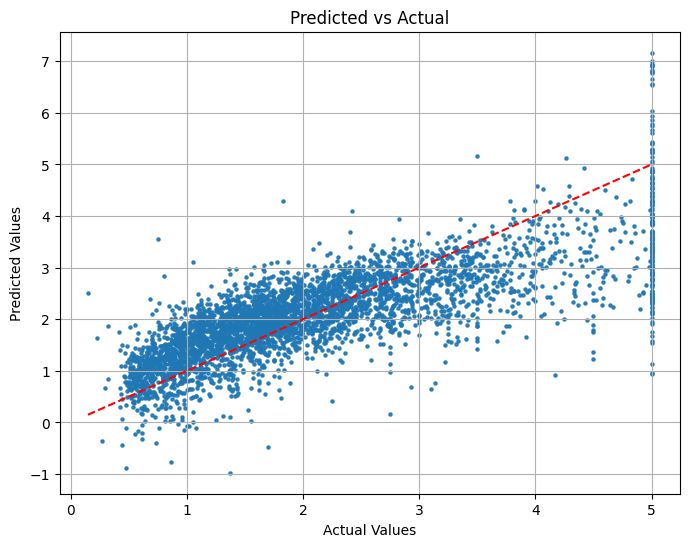

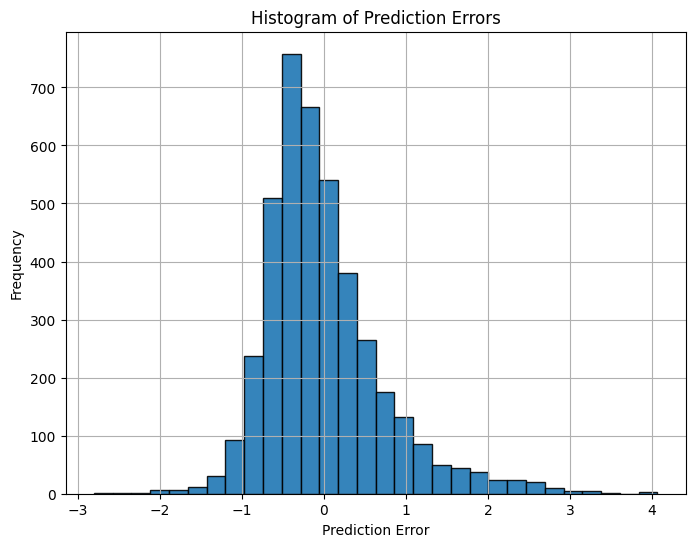

In [3]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
print("Intercept:", model_lin.intercept_)
np.set_printoptions(precision=8, suppress=True)
print("Coefficients:", model_lin.coef_)
print("Standardized Coefficient", model_lin.coef_*X_train.std())

y_pred_lin = model_lin.predict(X_test)
y_train_lin = model_lin.predict(X_train)

r2_lin_in = r2_score(y_train, y_train_lin)
mae_lin_in = mean_absolute_error(y_train, y_train_lin)
rmse_lin_in = np.sqrt(mean_squared_error(y_train, y_train_lin))

print("Training errors:")
print(f"R^2: {r2_lin_in:.4f}")
print(f"MAE: {mae_lin_in:.4f}")
print(f"RMSE: {rmse_lin_in:.4f}")


r2_lin_out = r2_score(y_test, y_pred_lin)
mae_lin_out = mean_absolute_error(y_test, y_pred_lin)
rmse_lin_out = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print("Testing errors:")
print(f"R^2: {r2_lin_out:.4f}")
print(f"MAE: {mae_lin_out:.4f}")
print(f"RMSE: {rmse_lin_out:.4f}")

errors = y_test - y_pred_lin

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lin, alpha=0.9, s=5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.9)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.grid(True)
plt.show()

In [4]:
# Linear Regression + PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline_PCR = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('lr', LinearRegression())
])

param_grid = {
    'pca__n_components': list(range(1, X_train.shape[1]+1))
}

grid = GridSearchCV(pipeline_PCR, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print(f"Best number of principal components: {grid.best_params_['pca__n_components']}")

Best number of principal components: 8


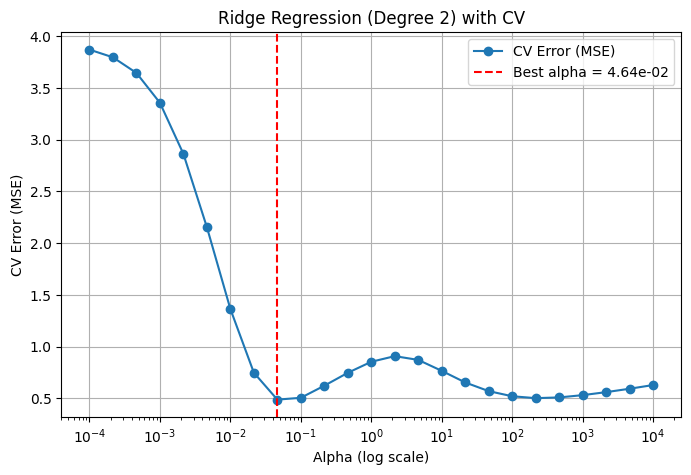

Best parameters: {'ridge__alpha': np.float64(0.046415888336127774)}
R2 train: 0.6831, test: 0.3378
RMSE train: 0.6512, test: 0.9293
MAE train: 0.4673, test: 0.4776
        MedInc  HouseAge  AveRooms  AveBedrms  Population     AveOccup  \
19006  10.2264      45.0  3.166667   0.833333      7460.0  1243.333333   
19435   0.5360      16.0  2.111111   2.111111       166.0    18.444444   
4861    0.4999      29.0  2.373272   1.055300      2690.0    12.396313   
12138   2.6250      16.0  4.000000   0.500000        39.0     2.785714   
10574   1.9659       6.0  4.795455   1.159091       125.0     2.840909   

       Latitude  Longitude   y_test     y_pred      Error  
19006     38.32    -121.98  1.37500 -40.651423  42.026423  
19435     37.67    -121.04  1.62500  -5.821074   7.446074  
4861      34.02    -118.28  5.00001  -1.423759   6.423769  
12138     33.87    -117.22  5.00001   1.163338   3.836672  
10574     33.72    -117.70  5.00001   1.272434   3.727576  


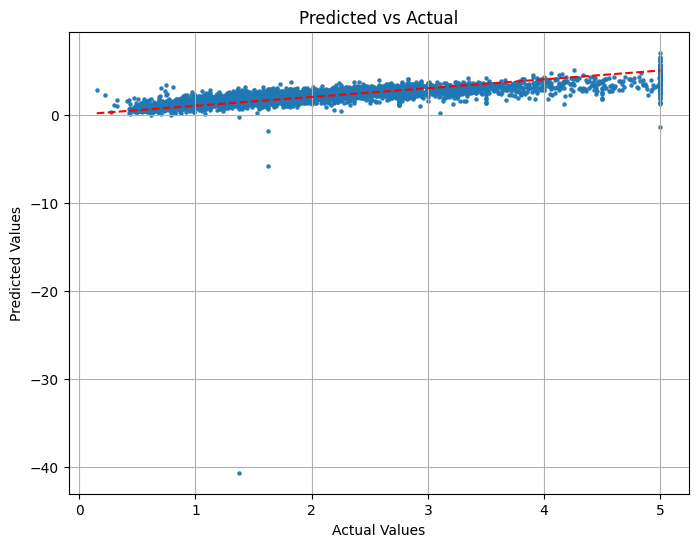

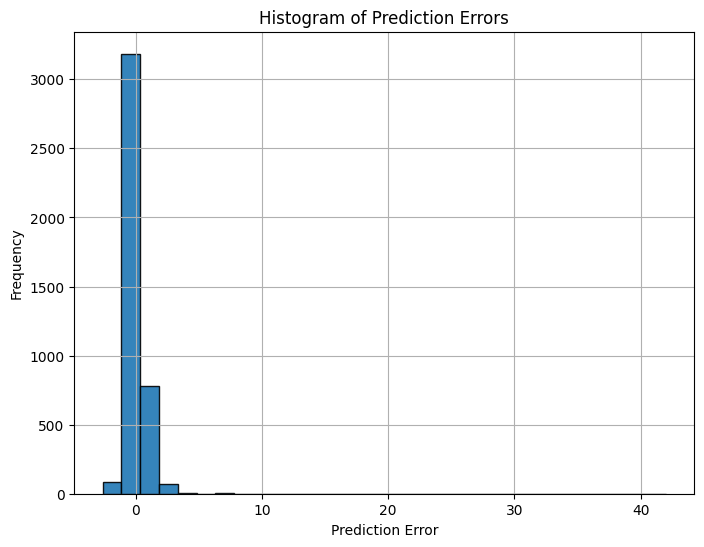

In [16]:
# Deg2 Poly + Ridge

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

pipeline_deg2 = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

alphas = np.logspace(-4, 4, 25)
param_grid = {
    'ridge__alpha': alphas
}

grid = GridSearchCV(pipeline_deg2, param_grid, cv=5, scoring="neg_mean_squared_error")
grid.fit(X_train, y_train)

mean_scores = -grid.cv_results_["mean_test_score"]

plt.figure(figsize=(8,5))
plt.semilogx(alphas, mean_scores, marker="o", label="CV Error (MSE)")
plt.axvline(grid.best_params_["ridge__alpha"], color="r", linestyle="--", label=f"Best alpha = {grid.best_params_['ridge__alpha']:.2e}")
plt.xlabel("Alpha (log scale)")
plt.ylabel("CV Error (MSE)")
plt.title("Ridge Regression (Degree 2) with CV")
plt.legend()
plt.grid(True)
plt.show()

best_model = grid.best_estimator_
y_train_deg2 = best_model.predict(X_train)
y_pred_deg2 = best_model.predict(X_test)

# Performance metrics
r2_deg2_in = r2_score(y_train, y_train_deg2)
r2_deg2_out = r2_score(y_test, y_pred_deg2)
mae_deg2_in = mean_absolute_error(y_train, y_train_deg2)
mae_deg2_out = mean_absolute_error(y_test, y_pred_deg2)
rmse_deg2_in = np.sqrt(mean_squared_error(y_train, y_train_deg2))
rmse_deg2_out = np.sqrt(mean_squared_error(y_test, y_pred_deg2))

print("Best parameters:", grid.best_params_)
print(f"R2 train: {r2_deg2_in :.4f}, test: {r2_deg2_out:.4f}")
print(f"RMSE train: {rmse_deg2_in:.4f}, test: {rmse_deg2_out:.4f}")
print(f"MAE train: {mae_deg2_in:.4f}, test: {mae_deg2_out:.4f}")


errors_deg2 = y_test.to_numpy() - y_pred_deg2

top5_idx = np.argsort(np.abs(errors_deg2))[-5:][::-1]

top5_y_test = y_test.iloc[top5_idx].values
top5_y_pred = y_pred_deg2[top5_idx]
top5_errors = errors_deg2[top5_idx]

top5_X = X_test.iloc[top5_idx]

outliers_df = top5_X.copy()
outliers_df["y_test"] = top5_y_test
outliers_df["y_pred"] = top5_y_pred
outliers_df["Error"] = top5_errors

print(outliers_df)



plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_deg2, alpha=0.9, s=5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(errors_deg2, bins=30, edgecolor='k', alpha=0.9)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.grid(True)
plt.show()

# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [13]:
# 建立 mask，True 表示要保留，False 表示要丟掉 outlier
mask = np.ones(len(y_test), dtype=bool)
mask[top5_idx] = False

# 過濾掉 outlier
y_test_filtered = y_test.iloc[mask]
y_pred_filtered = y_pred_deg2[mask]

# 重新計算指標
r2 = r2_score(y_test_filtered, y_pred_filtered)
mae = mean_absolute_error(y_test_filtered, y_pred_filtered)
rmse = np.sqrt(mean_squared_error(y_test_filtered, y_pred_filtered))

print("After dropping top 5 outliers:")
print(f"R^2  = {r2:.4f}")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")

top5_idx = np.argsort(np.abs(errors_deg2))[-5:][::-1]
print(type(top5_idx))
print(top5_idx.shape)

After dropping top 5 outliers:
R^2  = 0.6876
MAE  = 0.4628
RMSE = 0.6370
<class 'pandas.core.series.Series'>
(5,)
